0.0


In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import seaborn as sns

class systeme:
    def __init__ (self, input1, input2, input3, input4,input5,input6):
        self.nBox = input1
        self.nParticle = input2
        self.side = input3
        self.tabPinB = input4
        self.nMove = input5
        self.nStepView = input6
        self.tabForAverage = [0 for i in range (self.nParticle)]
    
    def initSystem (self):
        print("==== Simulation of the random movements of indistinguishable particles into indistinguishable boxes ====")
        
    def makeAStep(self):
        index = np.random.randint(0,self.nBox)
        if self.tabPinB[index] > 0:
            possibleNeighbours = []
            realNeighbours = []
            if index % self.side == 0:
                possibleNeighbours.extend([index+1,index+self.side,index-self.side,index-self.side+1,index+self.side+1])
            elif index % self.side == self.side-1:
                possibleNeighbours.extend([index-1,index+self.side,index-self.side,index-self.side-1,index+self.side-1])
            else :
                possibleNeighbours.extend([index-1,index+self.side,index-self.side,index-self.side-1,index+self.side-1,index+self.side+1,index+1,index-self.side+1])    
            for y in possibleNeighbours:        
                if y >=0 and y < self.nBox:
                    realNeighbours.append(y)
            newIndex = realNeighbours[np.random.randint(len(realNeighbours))]
            self.tabPinB[newIndex] = self.tabPinB[newIndex] +1
            self.tabPinB[index] = self.tabPinB[index] -1
            if self.nMove > self.nMove -100:
                for r in range (self.nParticle):
                    d = self.tabPinB.count(r)
                    self.tabForAverage[r] = self.tabForAverage[r]+ d
                
    def visualiseParticles(self):
        convertedPinB = [ [] for i in range(self.side)]
        indexrow=0
        z=0
        while indexrow <self.side:
            sublist = self.tabPinB[z:z+ self.side]
            convertedPinB[indexrow] = sublist
            indexrow+=1
            z+=self.side
        ax = sns.heatmap(np.array(convertedPinB), linewidth = 0.75)
        plt.title("Heatmap of the particles in the system")
        plt.show()  
        print(convertedPinB)
    def showEquilibrium(self):
        x = [i for i in range(self.nParticle)]
        y = [0 for i in range(self.nParticle)]
        for i in range(self.nParticle):
            y[i]= self.tabPinB.count(i)
        y2 = []
        for i in range(self.nParticle):
            y2.append(self.tabForAverage[i]/self.tabForAverage[0])
        plt.title("Average distribution of the system")
        plt.plot(x[0:6],y2[0:6])
        plt.show()

==== Simulation of the random movements of indistinguishable particles into indistinguishable boxes ====
At the beginning the system is composed of 36 particles and 36 boxes and looks like this:


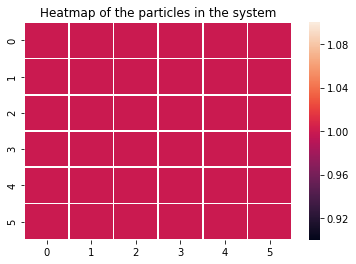

[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
After 100 steps the particles are arranged in the following way:


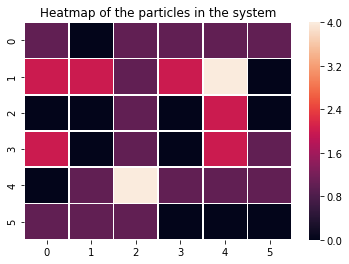

[[1, 0, 1, 1, 1, 1], [2, 2, 1, 2, 4, 0], [0, 0, 1, 0, 2, 0], [2, 0, 1, 0, 2, 1], [0, 1, 4, 1, 1, 1], [1, 1, 1, 0, 0, 0]]
After 200 steps the particles are arranged in the following way:


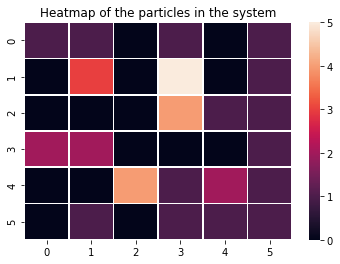

[[1, 1, 0, 1, 0, 1], [0, 3, 0, 5, 0, 1], [0, 0, 0, 4, 1, 1], [2, 2, 0, 0, 0, 1], [0, 0, 4, 1, 2, 1], [0, 1, 0, 1, 1, 1]]
After 300 steps the particles are arranged in the following way:


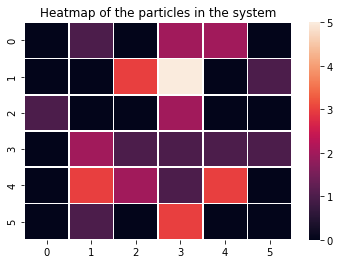

[[0, 1, 0, 2, 2, 0], [0, 0, 3, 5, 0, 1], [1, 0, 0, 2, 0, 0], [0, 2, 1, 1, 1, 1], [0, 3, 2, 1, 3, 0], [0, 1, 0, 3, 0, 0]]
After 400 steps the particles are arranged in the following way:


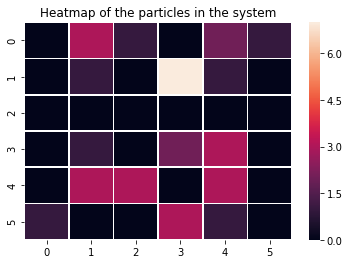

[[0, 3, 1, 0, 2, 1], [0, 1, 0, 7, 1, 0], [0, 0, 0, 0, 0, 0], [0, 1, 0, 2, 3, 0], [0, 3, 3, 0, 3, 0], [1, 0, 0, 3, 1, 0]]
After 500 steps the particles are arranged in the following way:


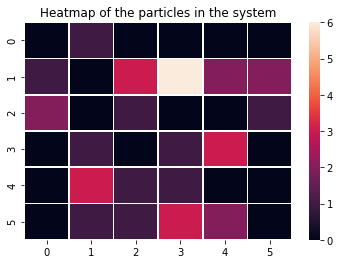

[[0, 1, 0, 0, 0, 0], [1, 0, 3, 6, 2, 2], [2, 0, 1, 0, 0, 1], [0, 1, 0, 1, 3, 0], [0, 3, 1, 1, 0, 0], [0, 1, 1, 3, 2, 0]]
After 600 steps the particles are arranged in the following way:


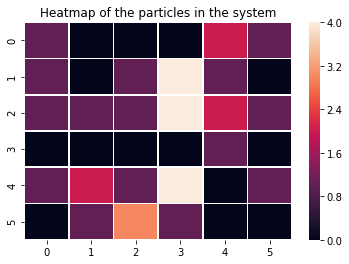

[[1, 0, 0, 0, 2, 1], [1, 0, 1, 4, 1, 0], [1, 1, 1, 4, 2, 1], [0, 0, 0, 0, 1, 0], [1, 2, 1, 4, 0, 1], [0, 1, 3, 1, 0, 0]]
After 700 steps the particles are arranged in the following way:


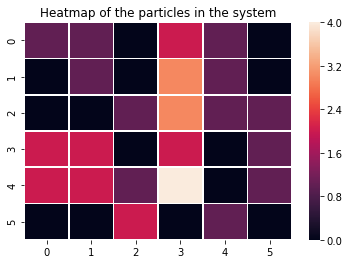

[[1, 1, 0, 2, 1, 0], [0, 1, 0, 3, 1, 0], [0, 0, 1, 3, 1, 1], [2, 2, 0, 2, 0, 1], [2, 2, 1, 4, 0, 1], [0, 0, 2, 0, 1, 0]]
After 800 steps the particles are arranged in the following way:


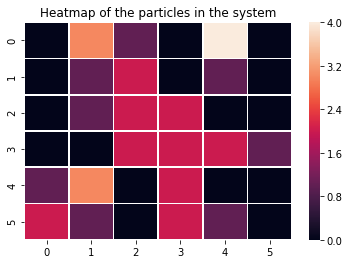

[[0, 3, 1, 0, 4, 0], [0, 1, 2, 0, 1, 0], [0, 1, 2, 2, 0, 0], [0, 0, 2, 2, 2, 1], [1, 3, 0, 2, 0, 0], [2, 1, 0, 2, 1, 0]]
After 900 steps the particles are arranged in the following way:


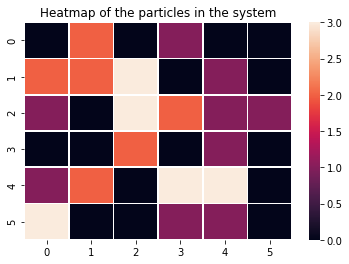

[[0, 2, 0, 1, 0, 0], [2, 2, 3, 0, 1, 0], [1, 0, 3, 2, 1, 1], [0, 0, 2, 0, 1, 0], [1, 2, 0, 3, 3, 0], [3, 0, 0, 1, 1, 0]]
After 1000 steps the particles are arranged in the following way:


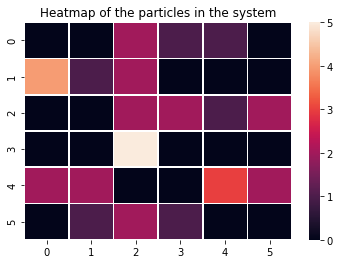

[[0, 0, 2, 1, 1, 0], [4, 1, 2, 0, 0, 0], [0, 0, 2, 2, 1, 2], [0, 0, 5, 0, 0, 0], [2, 2, 0, 0, 3, 2], [0, 1, 2, 1, 0, 0]]
After 1000 steps the average distribution of the system is:


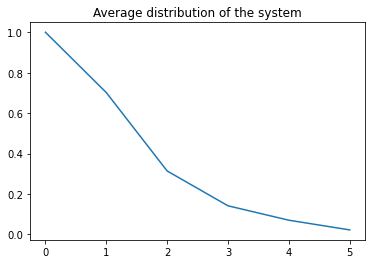

[0, 0, 2, 1, 1, 0, 4, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 5, 0, 0, 0, 2, 2, 0, 0, 3, 2, 0, 1, 2, 1, 0, 0]


In [5]:
tabBead = [ 1 for i in range(36)]
sys = systeme(36,36,6,tabBead,1000,100)
sys.initSystem()
print("At the beginning the system is composed of {} particles and {} boxes and looks like this:".format(sys.nParticle,sys.nBox))
sys.visualiseParticles()
for i in range (sys.nMove+1):
    sys.makeAStep()
    if i % sys.nStepView == 0 and i!= 0:
        print("After {} steps the particles are arranged in the following way:".format(i))
        sys.visualiseParticles()
print("After {} steps the average distribution of the system is:".format(sys.nMove))
sys.showEquilibrium()
print(sys.tabPinB)